In [146]:
from ipywidgets import IntProgress
from IPython.display import display
from random import shuffle
import matplotlib.pyplot as plt
from typing import Callable

In [147]:
%config InlineBackend.figure_format = 'svg'

In [148]:
# Python program for implementation of Bubble Sort

def bubbleSort(arr):
    comparisons_count = 0
    assignments_count = 0
    n = len(arr)
    # optimize code, so if the array is already sorted, it doesn't need
    # to go through the entire process
    swapped = False
    # Traverse through all array elements
    assignments_count += 2
    for i in range(n-1):
        # range(n) also work but outer loop will
        # repeat one time more than needed.
        # Last i elements are already in place
        for j in range(0, n-i-1):

            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j + 1]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                assignments_count += 3
                comparisons_count += 1
            else:
                comparisons_count += 1

        if not swapped:

            # if we haven't needed to make a single swap, we
            # can just exit the main loop.
            comparisons_count += 1
            return comparisons_count, assignments_count
    return comparisons_count, assignments_count

In [149]:
# Python program for implementation of MergeSort

# Merges two subarrays of arr[].
# First subarray is arr[l..m]
# Second subarray is arr[m+1..r]

def merge(arr, l, m, r):
    comparisons_count = 0
    assignments_count = 0
    n1 = m - l + 1
    n2 = r - m

    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)
    assignments_count += 4
    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]
        assignments_count += 1

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
        assignments_count += 1

    # Merge the temp arrays back into arr[l..r]
    i = 0	 # Initial index of first subarray
    j = 0	 # Initial index of second subarray
    k = l	 # Initial index of merged subarray
    assignments_count += 1
    while i < n1 and j < n2:
        comparisons_count += 2
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1

        else:
            arr[k] = R[j]
            j += 1
        comparisons_count += 1
        k += 1
        assignments_count += 3
    else:
        comparisons_count += 2

    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
        assignments_count += 3
    else:
        comparisons_count += 1
    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:

        arr[k] = R[j]
        j += 1
        k += 1
        comparisons_count += 1
        assignments_count += 3
    else:
        comparisons_count += 1

    return comparisons_count, assignments_count

# l is for left index and r is right index of the
# sub-array of arr to be sorted


def mergeSort(arr, l, r):

    comparisons_count = 0
    assignments_count = 0
    if l < r:
        comparisons_count += 1
        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2
        assignments_count += 1
        # Sort first and second halves
        tmp = mergeSort(arr, l, m)
        comparisons_count += tmp[0]
        assignments_count += tmp[1]
        tmp = mergeSort(arr, m+1, r)
        comparisons_count += tmp[0]
        assignments_count += tmp[1]
        tmp = merge(arr, l, m, r)
        comparisons_count += tmp[0]
        assignments_count += tmp[1]
    return comparisons_count, assignments_count

# This code is contributed by Mohit Kumra

In [150]:
def insertionsort(A: list[int]):
    comparisons_count = 0
    assignments_count = 0
    # we start loop at second element (index 1) since the first item is already sorted
    for j in range(1, len(A)):
        # The next item we are going to insert into the sorted section of the array
        key = A[j]

        i = j-1  # the last item we are going to compare to
        # now we keep moving the key back as long as it is smaller than the last item in the array
        assignments_count += 2
        # if i == -1 means that this key belongs at the start
        while (i > -1) and key < A[i]:
            # move the last object compared one step ahead to make room for key
            A[i+1] = A[i]
            i = i-1  # observe the next item for next time.
            assignments_count += 2
            comparisons_count += 2
        else:
            comparisons_count += 2
        # okay i is not greater than key means key belongs at i+1
        A[i+1] = key
        assignments_count += 1
    return comparisons_count, assignments_count

IntProgress(value=0, max=18000)

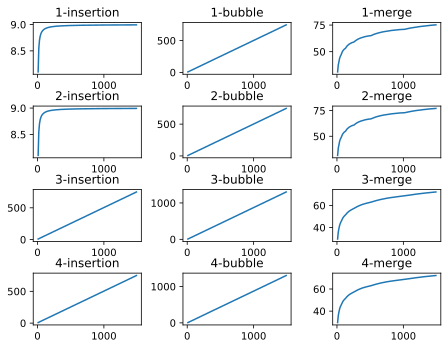

In [152]:
max_n = 1500
f = IntProgress(min=0, max=max_n*12)
display(f)
figure, axis = plt.subplots(4, 3)
# plt.subplots_adjust(hspace=1)
figure.tight_layout()
for option_number in range(1, 5):
    for sorter_number in range(1, 4):
        results = []
        for n in range(10, max_n, 10):

            question_list = list(range(1, n + 1))

            if option_number == 1:
                question_list.pop(0)
                question_list.append(1)
            if option_number == 2:
                question_list.pop()
                question_list.insert(0, n)
            if option_number == 3:
                # k = randint(2, n-1)
                k = round(n / 2)
                question_list = list(range(1, k + 1))
                question_list.append(n)
                question_list += reversed(list(range(k + 1, n)))
            if option_number == 4:
                # k = randint(2, n-1)
                k = round(n / 2)
                question_list = list(reversed(range(1, k + 1)))
                question_list += list(range(k + 1, n + 1))
            if sorter_number == 1:
                sort_results = insertionsort(question_list)
            elif sorter_number == 2:
                sort_results = bubbleSort(question_list)
            elif sorter_number == 3:
                sort_results = mergeSort(
                    question_list, 0, len(question_list)-1)
            else:
                # this never happens
                sort_results = 0, 0
            results.append((n, (sort_results[0] + sort_results[1]) / n))
            f.value += n
        cell = axis[option_number - 1, sorter_number -
                    1]
        cell.set_title(
            f"{option_number}-{['insertion' , 'bubble' , 'merge'][sorter_number-1]}")
        cell.plot([result[0] for result in results], [result[1]
                  for result in results])
plt.show()